# Gram continuation

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy

F = np.fromfile("/home/calab912/Documents/fdm-hybrid-scheme/demonstration/nD=10_nd=27_g=63_Gamma=150.bin").reshape(20, 70) 
Fe = F[:10, :]
Fo = F[10:, :]
Pl = np.fromfile("/home/calab912/Documents/fdm-hybrid-scheme/demonstration/Pleft_nD=10.bin").reshape(10, 10) 
Pr = np.fromfile("/home/calab912/Documents/fdm-hybrid-scheme/demonstration/Pright_nD=10.bin").reshape(10, 10) 


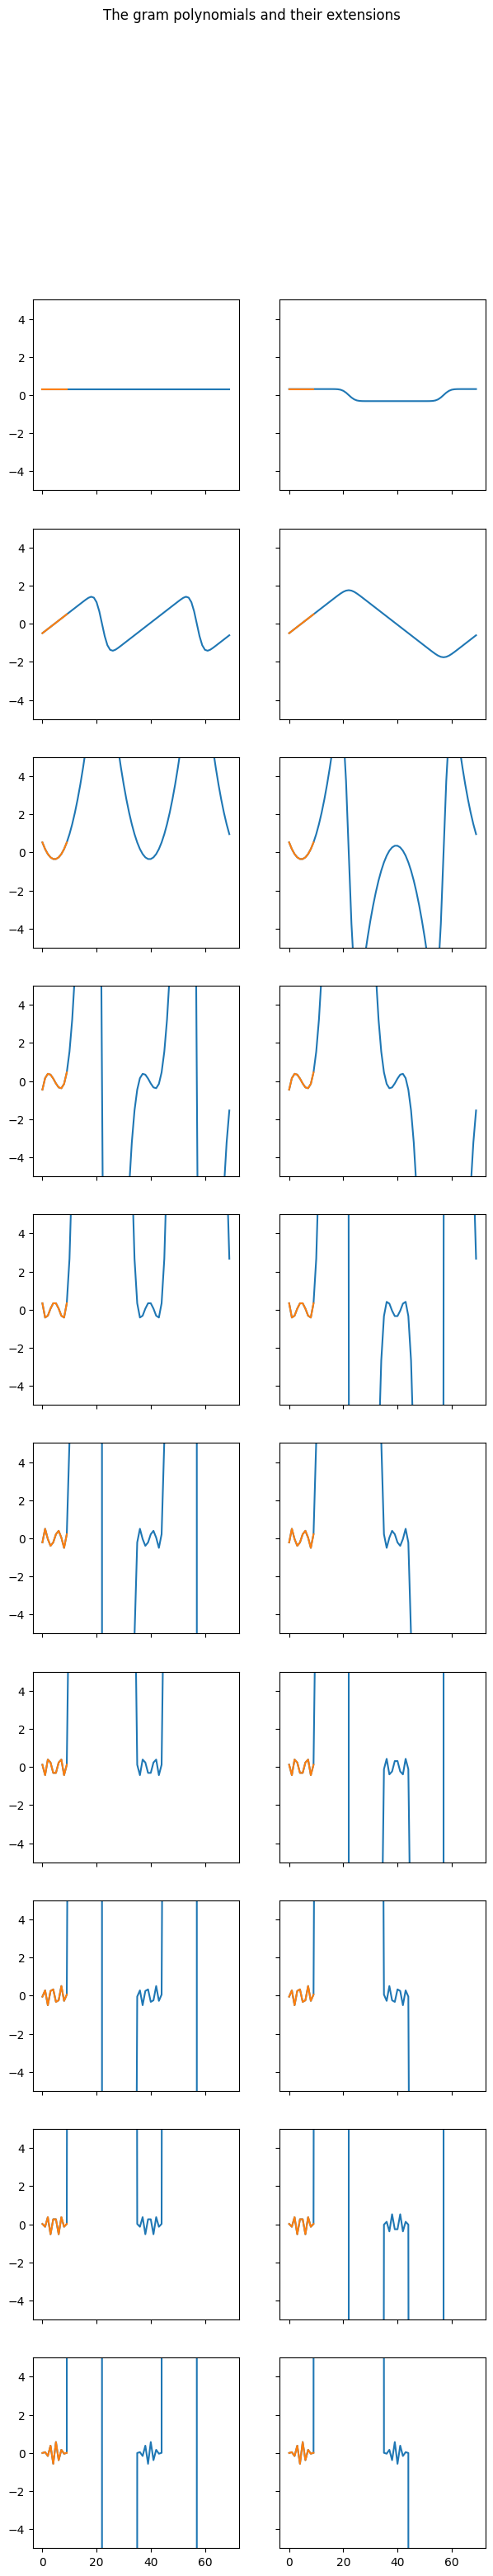

In [84]:
fig, axs = plt.subplots(10, 2, sharex=True, sharey=True, figsize=(3.54 * 2, 3.54*10))
fig.suptitle("The gram polynomials and their extensions")
for i in range(10):
    axs[i, 1].set_ylim(-5, 5)
    axs[i, 1].plot(Fo[i, :])
    axs[i, 1].plot(Pr[i, :])
    axs[i, 0].set_ylim(-5, 5)
    axs[i, 0].plot(Fe[i, :])
    axs[i, 0].plot(Pr[i, :])
plt.show()

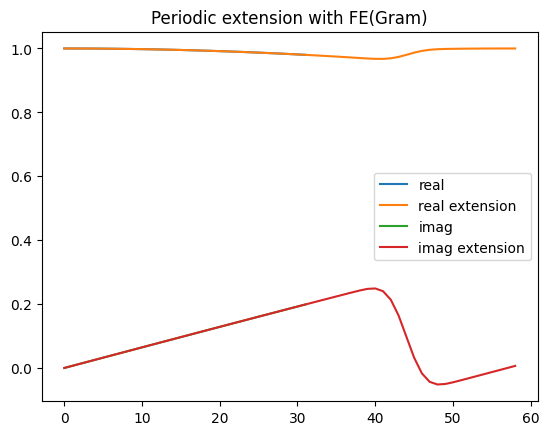

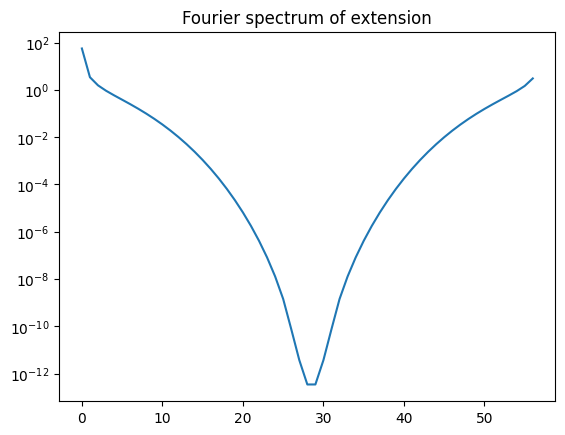

In [87]:
m      = 10
n      = 10 
nDelta = 10 
nd     = 27
Gamma  = 150
g      = 63

n = 32
x = np.linspace(0, 0.2, n)

leftBoundary  = x[       :nDelta]
rightBoundary = x[-nDelta:      ]

f = np.exp(1j*1*x)

fl = f[:nDelta]
fr = f[-nDelta:]

al     = Pl @ fl 
ar     = Pr @ fr 
fpl    = al @ Pl 
fpr    = ar @ Pr 
fmatch = (al + ar)/2 @ Fe + (ar - al)/2 @ Fo

fdp = np.concatenate([fpl, f[nDelta:-nDelta], fpr, fmatch[nDelta:nDelta + nd]])

plt.title("Periodic extension with FE(Gram)")
plt.plot(f.real, label="real")
plt.plot(fdp.real, label="real extension")
plt.plot(f.imag, label="imag")
plt.plot(fdp.imag, label="imag extension")
plt.legend()
plt.show()

plt.title("Fourier spectrum of extension")
plt.yscale("log")
plt.plot(np.abs(scipy.fft.fft(fdp[:-2])))
plt.show()

In [64]:
fdp, len(fdp), n + nd - 2

(array([-5.22614809e-18,  9.66232119e-02,  1.92342230e-01,  2.86261321e-01,
         3.77501597e-01,  4.65209236e-01,  5.48563476e-01,  6.26784293e-01,
         6.99139702e-01,  7.64952605e-01,  8.23607129e-01,  8.74554388e-01,
         9.17317622e-01,  9.51496655e-01,  9.76771641e-01,  9.92906059e-01,
         9.99748924e-01,  9.97236200e-01,  9.85391402e-01,  9.64325373e-01,
         9.34235246e-01,  8.95402605e-01,  8.48190841e-01,  7.93041760e-01,
         7.30471444e-01,  6.61065422e-01,  5.85473190e-01,  5.04402136e-01,
         4.18610919e-01,  3.28902367e-01,  2.36115967e-01,  1.41120008e-01,
         4.48034572e-02, -5.19323614e-02, -1.48182199e-01, -2.43045358e-01,
        -3.35634246e-01, -4.25083876e-01, -5.10565204e-01, -5.91296756e-01,
        -6.66483709e-01, -7.34979335e-01, -7.94514670e-01, -8.40973444e-01,
        -8.68933097e-01, -8.74029872e-01, -8.55556021e-01, -8.16833650e-01,
        -7.63052095e-01, -6.98734853e-01, -6.26721594e-01, -5.48556784e-01,
        -4.6